<center>COMP0078 Supervised Learning 2023/24</center>


<left>Coursework </left> 

<left> Due Date 1600 Hrs 10 Nov, 2023</left>
<center> Students 23204577 and 23219902 </center>
<center> </center>

1. The codes use plotly to dispay interactive graphs which need to be installed prior to running the notebook

    * Alternatively a snapshot of all plots is attached below the cell where it was generated so that the results can be seen even in .html or .pdf file

In [ ]:
%pip install numpy plotly pandas tqdm scikit-learn

In [194]:
import numpy as np
from typing import Any, Union, List, Tuple

import numpy.typing as npt
import plotly.graph_objects as go
import plotly.express as px

import pandas as pd
from sklearn.model_selection import train_test_split, KFold

from tqdm import tqdm

In [601]:
def assert_np_shape(a, shape: Union[List, Tuple]) -> bool:
    """
    assert_np_shape helper function to check the shapes of numpy arrays and vectors
    before operating on them using inbuilt function

    This function checks the all the shape of a numpy array
    each value in a.shape is checked against each value in shape
    value of elements in shape can be
        int: exact shape to be checked in a
        str: "n" value in this dimension is not checked

    :param a: numpy array to be checked
    :type a: np.array
    :param shape: iterable of shapes to be checked.
    :type shape: Union[List, Tuple]
    :return: whther shape of array is same as shape argument
    :rtype: bool
    """
    if len(a.shape) != len(shape):
        return False

    for dim in zip(a.shape, shape):
        if isinstance(dim[1], int) is False:
            continue
        if dim[0] != dim[1]:
            return False

    return True

# Part I

## 1.1 Linear Regression

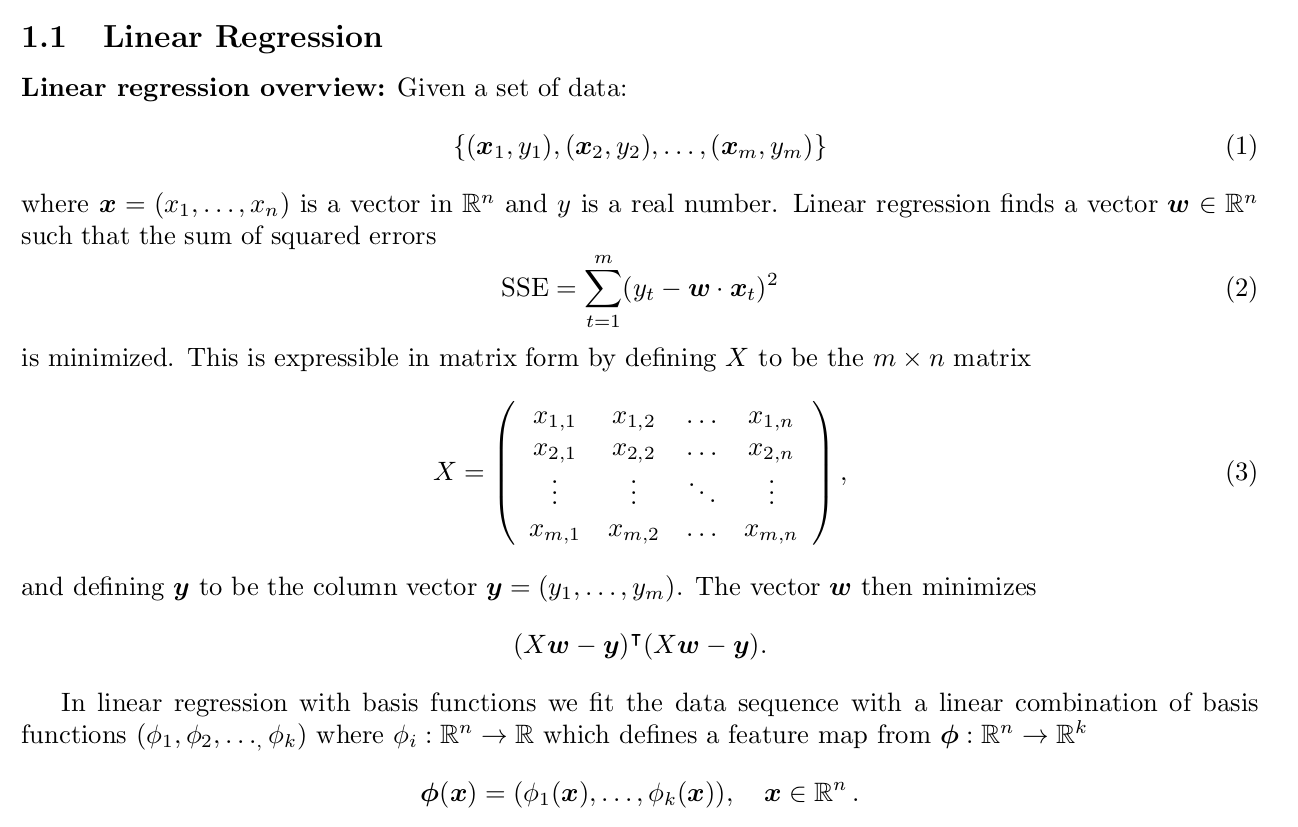
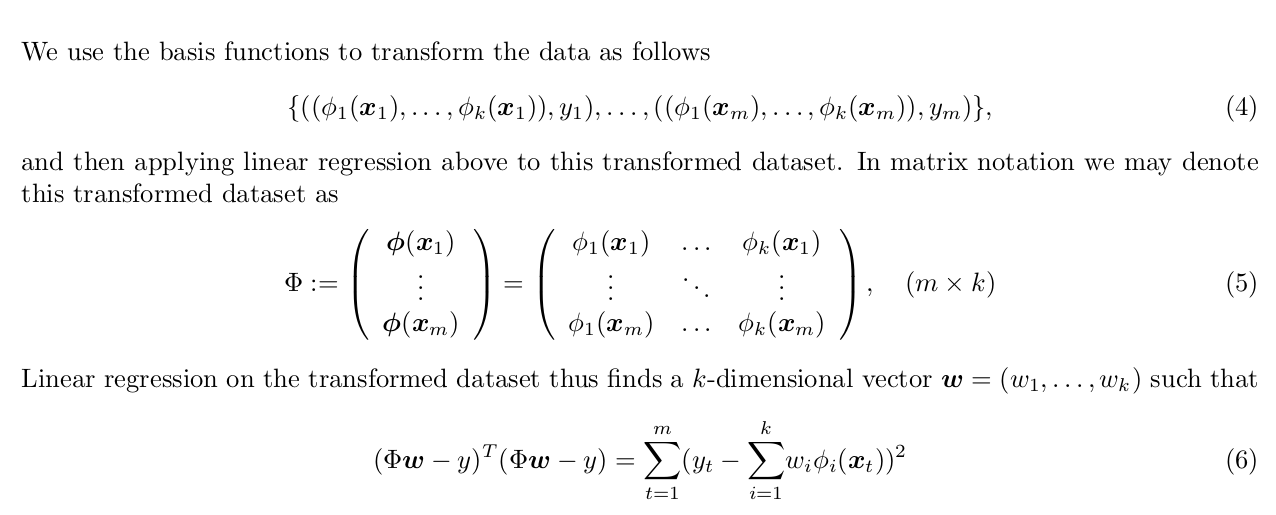

We will be using polynomial basis functions such that it transforms our data $x \in \mathbb{R}$  to $\phi(x) \in \mathbb{R}^k$ for k in {1, 2, 3, 4}
### Q1

In [196]:
x = np.array([[i] for i in [1, 2, 3, 4]])
print(x, x.shape)

# define x as a column vector

[[1]
 [2]
 [3]
 [4]] (4, 1)


In [197]:
y = np.array([[i] for i in [3, 2, 0, 5]])
print(y, y.shape)

# define y as a column vector

[[3]
 [2]
 [0]
 [5]] (4, 1)


$$
\newline 
\newline 
\text{For k}= 1:


\begin{bmatrix}
    1 \\
    1 \\
    1 \\
    1 \\
\end{bmatrix}


\newline 
\newline 
\text{For k} = 2


\begin{bmatrix}
    1 & x^2 \\
    1 & x^2 \\
    1 & x^2 \\
    1 & x^2 \\
\end{bmatrix}


\newline 
\newline 
\text{For k} = 3:


\begin{bmatrix}
    1 & x^2 & x^3 \\
    1 & x^2 & x^3 \\
    1 & x^2 & x^3 \\
    1 & x^2 & x^3 \\
\end{bmatrix}


\newline 
\newline 
\text{For k} = 4:


\begin{bmatrix}
    1 & x^2 & x^3 & x^4 \\
    1 & x^2 & x^3 & x^4 \\
    1 & x^2 & x^3 & x^4 \\
    1 & x^2 & x^3 & x^4 \\
\end{bmatrix}

$$

In [198]:
def make_linear_X_matrix(x, k: int):
    """
    make_linear_X_matrix make the X matrix of shape (m, k)

    depending on the basis function defined by k the number of columns
    of matrix will vary.
    first column : all ones
    second columns : x
    thrid column : x^2
    and so on

    :param x: np.array of shape (m,1)
    :type x: np.array
    :param k: parameter for basis function
        k=1 {1}
        k=2 {1, x^2}
        k=3 {1, x^2, x^3}
        k=4 {1, x^2, x^3, x^4}
    :type k: int
    :return: Matrix X of shape (m,k)
    :rtype: np.array
    """

    assert assert_np_shape(x, ["n", 1])

    X = np.ones(shape=(x.shape[0], k))

    for col in range(k):
        X[:, col] *= np.power(x[:, 0], col)

    assert assert_np_shape(X, ["n", k])
    return X


X = make_linear_X_matrix(x, k=3)

print(X, X.shape)

[[ 1.  1.  1.]
 [ 1.  2.  4.]
 [ 1.  3.  9.]
 [ 1.  4. 16.]] (4, 3)


In [199]:
def write_equation(k: int, W) -> str:
    """
    write_equation write equation in proper format

    equations as a1*x + a2*x^2 + a3*x^3 ...

    :param k: (k-1) is the maximum power of x
    :type k: int
    :param W: Weight vector has the shape (k, 1)
    :type W: np.array
    :return: equation as a string
    :rtype: str
    """
    assert assert_np_shape(W, [k, 1])
    W = W[:, 0]
    equation = f"{W[0]:.02f}"

    for x_pow in range(1, k):
        if W[x_pow] < 0:
            equation += f" {W[x_pow]:.02f} x^{x_pow}"
        else:
            equation += f" +{W[x_pow]:.02f} x^{x_pow}"
    return equation

In [200]:
def calculate_MSE(orignal_y, predicted_y) -> float:
    """
    calculate_MSE Calculate mean squared error given
    predicted values and actual values

    first calculate the Sum squared error
    then mean squared error

    :param orignal_y: orignal y vector, shape should be (n, 1)
    :type orignal_y: np.array
    :param predicted_y: predicted y vector, shape should be (n, 1)
    :type predicted_y: np.array
    :decimals: decimals to round off to while returning
    :return: return the Mean squared error
    :rtype: float
    """
    assert assert_np_shape(orignal_y, predicted_y.shape)

    SE = orignal_y - predicted_y
    SSE = np.sum(SE**2)

    MSE = SSE / np.size(orignal_y)

    return MSE

0.09999999999999998

#### a

Plot superimposing the four different curves corresponding to each fit over the four data points.

#### b

Give the equations corresponding to the curves fitted for k = 1, 2, 3.
 
#### c

For each fitted curve k = 1, 2, 3, 4 give the mean square error MSE

In [201]:
org_pts = go.Figure(
    data=go.Scatter(
        x=x[:, 0],
        y=y[:, 0],
        mode="markers",
        hovertemplate="<br>x=%{x}</br>y=%{y}<extra></extra>",
        name="data points",
    )
)

org_pts.update_layout(title="Data points")
org_pts.show()

MSE_k = []

for k in range(1, 5):
    X = make_linear_X_matrix(x, k=k)

    W = np.linalg.pinv(X.T @ X) @ X.T @ y

    pts_x = np.linspace(0, 6, 100, dtype=float).reshape((100, 1))
    pts_X = make_linear_X_matrix(pts_x, k=k)
    pts_y = pts_X @ W

    equation = write_equation(k, W)

    X = make_linear_X_matrix(x, k=k)
    predicted_y = X @ W

    MSE_k.append(calculate_MSE(y, predicted_y))
    print(f"k={k} : ", equation)
    print(f"k={k} : MSE {MSE_k[-1]}")

    org_pts.add_trace(
        go.Scatter(
            x=pts_x[:, 0], y=pts_y[:, 0], name="k=" + str(k), hovertemplate=f"k={k}"
        )
    )


org_pts.update_layout(
    title="Fitted polynomials", yaxis_range=[-5, 8], xaxis_range=[-0, 5]
)

org_pts.show()

MSE_vs_k = go.Figure(
    data=go.Scatter(
        x=np.arange(1, 5, 1),
        y=MSE_k,
        mode="markers",
        hovertemplate="<br>x=%{x}</br>y=%{y}<extra></extra>",
    )
)
MSE_vs_k.update_layout(
    title="MSE vs k",
    xaxis_title="k",
    yaxis_title="MSE",
)
MSE_vs_k.show()

k=1 :  2.50
k=1 : MSE 3.25
k=2 :  1.50 +0.40 x^1
k=2 : MSE 3.05
k=3 :  9.00 -7.10 x^1 +1.50 x^2
k=3 : MSE 0.7999999999999984
k=4 :  -5.00 +15.17 x^1 -8.50 x^2 +1.33 x^3
k=4 : MSE 1.1533033153905203e-22


### Q2



we define g as

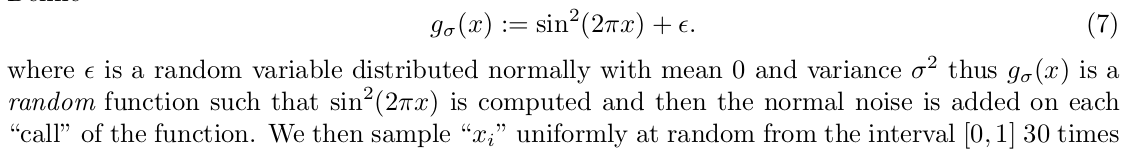


1. 30 x values are sampled from uniform distribution [0, 1)
2. 30 $g(x,\sigma)$ values are then estimated

We end up with the following set

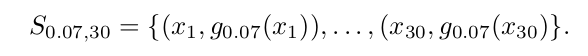




In [200]:
def g_func(x, sigma: float):
    """
    g_func= sin^2(2 pi x) + noise

    noise is given by a random variable epsilon randomly distributed
    in with mean 0 and SD sigma

    :param x: vector, shape (n,1)
    :type x: np.array
    :param sigma: standard deviation of normal distribution for noise
    :type sigma: float
    :return: vector of shape same as x, (n,1)
    :rtype: np.array
    """

    assert assert_np_shape(x, ["n", 1])

    epsilon = np.random.normal(loc=0.0, scale=sigma, size=x.shape)

    g = (np.sin(2 * np.pi * x) ** 2) + epsilon

    assert assert_np_shape(g, x.shape)

    return g

#### a.i

We Plot the function $sin^2(2πx)$ in the range 0 ≤ x ≤ 1 with the points of the above data set
superimposed

In [229]:
x = np.random.random_sample((30, 1))
g = g_func(x, 0.07)


sin2_points = go.Figure(
    data=go.Scatter(
        x=x[:, 0],
        y=g[:, 0],
        mode="markers",
        name="data point",
        hovertemplate="<br>x=%{x}</br>y=%{y}<extra></extra>",
    )
)

In [230]:
x_pts = np.linspace(0, 1, 100)
x_pts = x_pts.reshape((x_pts.size, 1))

g_pts = g_func(x_pts, 0.0)

sin2_points.add_trace(go.Scatter(x=x_pts[:, 0], y=g_pts[:, 0], name="(sin(2*pi*x))**2"))

sin2_points.show()

#### a.ii

Fit the data set with a polynomial bases of dimension k = 2, 5, 10, 14, 18 plot each of these
5 curves superimposed over a plot of data points

In [231]:
sin2_points = go.Figure(
    data=go.Scatter(
        x=x[:, 0],
        y=g[:, 0],
        mode="markers",
        name="data point",
        hovertemplate="<br>x=%{x}</br>y=%{y}<extra></extra>",
    )
)

for k in [2, 5, 10, 14, 15, 18]:
    X = make_linear_X_matrix(x, k=k)

    W = np.linalg.pinv(X.T @ X) @ X.T @ g  # find W using orgnal data points

    pts_x = np.linspace(0, 1, 100, dtype=float).reshape((100, 1))
    pts_X = make_linear_X_matrix(pts_x, k=k)
    pts_y = pts_X @ W

    sin2_points.add_trace(
        go.Scatter(
            x=pts_x[:, 0],
            y=pts_y[:, 0],
            name="k=" + str(k),
            hovertemplate=f"k={k}",
            mode="lines",
        )
    )
sin2_points.update_layout(yaxis_range=[-0.5, 1.5], xaxis_range=[-0.1, 1.1])
sin2_points.show()

#### b
* We have 30 training points
* We use them to estimate the MSE
* Plot the natural log (ln) of the training error versus k

*this should be a decreasing function*

In [232]:
train_err = []

for k in range(1, 19):
    X = make_linear_X_matrix(x, k=k)

    W = np.linalg.pinv(X.T @ X) @ X.T @ g  # calculate W using orignal points

    predicted_y = X @ W

    train_err.append(calculate_MSE(g, predicted_y))

In [240]:
train_err_vs_k = go.Figure(
    data=go.Scatter(
        x=np.arange(1, 19, 1),
        y=np.log(train_err),
        mode="markers+lines",
        name="Training error",
        hovertemplate="<br>k=%{x}</br>y=%{y}<extra></extra>",
    )
)

train_err_vs_k.update_layout(
    title="Ln(train_error) vs K", xaxis_title="K", yaxis_title="ln(train error)"
)
train_err_vs_k.show()

#### c

* Generate **1000** points for **testing** in the same way as training data. Plot the ln of the test error versus K

In [241]:
test_x = np.random.random_sample((1000, 1))
test_g = g_func(test_x, 0.07)

In [242]:
test_err = []

for k in range(1, 19):
    X = make_linear_X_matrix(x, k=k)

    W = np.linalg.pinv(X.T @ X) @ X.T @ g

    X = make_linear_X_matrix(test_x, k=k)

    predicted_y = X @ W

    test_err.append(calculate_MSE(test_g, predicted_y))

In [243]:
test_err_vs_k = go.Figure(
    data=go.Scatter(
        x=np.arange(1, 19, 1),
        y=np.log(test_err),
        mode="markers+lines",
        name="Testing error",
        hovertemplate="<br>k=%{x}</br>y=%{y}<extra></extra>",
    )
)

test_err_vs_k.update_layout(
    title="Ln(Test error) vs K", xaxis_title="K", yaxis_title="Ln(Test error)"
)
test_err_vs_k.show()

* Visualising training and test error side by side vs K

In [244]:
train_err_vs_k.add_trace(test_err_vs_k.data[0])
train_err_vs_k.update_layout(title="Ln(Train error) and Ln(Test error) vs K")

train_err_vs_k.show()

#### d

Pseudo code

1. Select k = {1, 2, 3..... 18}
    * Loop 100 times
        * Generate 30 points for training
        * Calculate training error
        * Generate 1000 points for testing
        * Calculate testing error
    * Take the average of 100 training and testing errors for any given k
2. Plot Ln(avg training error) vs k
3. Plot Ln(avg testing error) vs k


In [245]:
test_err = np.zeros((100, 18), dtype=float)
train_err = np.zeros((100, 18), dtype=float)

for k in range(1, 19):
    for step in range(100):
        x = np.random.random_sample((30, 1))
        g = g_func(x, 0.07)
        X = make_linear_X_matrix(x, k=k)

        W = np.linalg.pinv(X.T @ X) @ X.T @ g  # calculate W using orignal points
        predicted_y = X @ W

        train_err[step, k - 1] = calculate_MSE(g, predicted_y)

        test_x = np.random.random_sample((1000, 1))
        test_g = g_func(test_x, 0.07)

        X = make_linear_X_matrix(test_x, k=k)

        predicted_y = X @ W

        test_err[step, k - 1] = calculate_MSE(test_g, predicted_y)

In [246]:
train_err_avg = np.average(train_err, axis=0)
test_err_avg = np.average(test_err, axis=0)

In [248]:
train_err_vs_k = go.Figure(
    data=[
        go.Scatter(
            x=np.arange(1, 19, 1),
            y=np.log(train_err_avg),
            mode="markers+lines",
            name="Avg Training error",
            hovertemplate="<br>k=%{x}</br>y=%{y}<extra></extra>",
        ),
        go.Scatter(
            x=np.arange(1, 19, 1),
            y=np.log(test_err_avg),
            mode="markers+lines",
            name="Avg Testing error",
            hovertemplate="<br>k=%{x}</br>y=%{y}<extra></extra>",
        ),
    ]
)

train_err_vs_k.update_layout(
    title="Ln(Avg Train error) and Ln(Avg Test error) vs K",
    xaxis_title="K",
    yaxis_title="Ln(error)",
)
train_err_vs_k.show()

### Q3

Now we use the following basis

$$\{sin(1 \pi x), sin(2 \pi x), sin(3\pi x),....sin(k\pi x)\}$$


We make a new function that returns the matrix similar to what we did above

In [250]:
def make_sin_X_matrix(x, k: int):
    """
    make_sin_X_matrix generate the basis function of sines

    no. of columns = k
    no. of rows = no. of training samples in x

    column 1 : sin(1 * pi* x)
    column 2 : sin(2 * pi * x)
    .
    .
    .
    column k : sin(k * pi * x)

    :param x: vector of data points, shape (n,1)
    :type x: np.array
    :param k: parameter for making the basis function
    :type k: int
    :return: return the X matrix of shape (n, k)
    :rtype: np.array
    """
    assert assert_np_shape(x, ["n", 1])

    X = np.ones(shape=(x.shape[0], k))

    for col in range(k):
        X[:, col] = np.sin((col + 1) * np.pi * x[:, 0])

    assert assert_np_shape(X, [x.size, k])
    return X

* Make a set of 30 training samples
* visualise what the fit would look like

In [ ]:
x = np.random.random_sample((30, 1))
g = g_func(x, 0.07)

In [252]:
sin2_points = go.Figure(
    data=go.Scatter(
        x=x[:, 0],
        y=g[:, 0],
        mode="markers",
        name="data point",
        hovertemplate="<br>x=%{x}</br>y=%{y}<extra></extra>",
    )
)

for k in [2, 5, 10, 14, 15, 18]:
    X = make_sin_X_matrix(x, k=k)

    W = np.linalg.pinv(X.T @ X) @ X.T @ g  # find W using orgnal data points

    pts_x = np.linspace(0, 1, 100, dtype=float).reshape((100, 1))
    pts_X = make_sin_X_matrix(pts_x, k=k)
    pts_y = pts_X @ W

    sin2_points.add_trace(
        go.Scatter(
            x=pts_x[:, 0],
            y=pts_y[:, 0],
            name="k=" + str(k),
            hovertemplate=f"k={k}",
            mode="lines",
        )
    )
sin2_points.update_layout(yaxis_range=[-0.5, 1.5], xaxis_range=[-0.1, 1.1])
sin2_points.show()

#### a

* Plot the Ln(training error) versus k = 1, 2, 3 . . , 18

In [253]:
x = np.random.random_sample((30, 1))
g = g_func(x, 0.07)

In [254]:
train_err = []

for k in range(1, 19):
    X = make_sin_X_matrix(x, k=k)

    W = np.linalg.pinv(X.T @ X) @ X.T @ g  # calculate W using orignal points

    predicted_y = X @ W

    train_err.append(calculate_MSE(g, predicted_y))

In [256]:
train_err_vs_k = go.Figure(
    data=go.Scatter(
        x=np.arange(1, 19, 1),
        y=np.log(train_err),
        mode="markers+lines",
        name="data point",
        hovertemplate="<br>k=%{x}</br>y=%{y}<extra></extra>",
    )
)

train_err_vs_k.update_layout(title="Ln(train_error) vs K")
train_err_vs_k.show()

#### b

* Generate 1000 test points and calcuate the testing error. Plot the ln (test error) versus k= {1,2,3....18}

In [257]:
test_x = np.random.random_sample((1000, 1))
test_g = g_func(test_x, 0.07)

In [258]:
test_err = []

for k in range(1, 19):
    X = make_sin_X_matrix(x, k=k)

    W = np.linalg.pinv(X.T @ X) @ X.T @ g  # calculate W using orignal points

    X = make_sin_X_matrix(test_x, k=k)

    predicted_y = X @ W

    test_err.append(calculate_MSE(test_g, predicted_y))

In [259]:
test_err_vs_k = go.Figure(
    data=go.Scatter(
        x=np.arange(1, 19, 1),
        y=np.log(test_err),
        mode="markers+lines",
        name="data point",
        hovertemplate="<br>k=%{x}</br>y=%{y}<extra></extra>",
    )
)

test_err_vs_k.update_layout(title="Log(test_err) vs k")

test_err_vs_k.show()

#### c

plot the Log(average train error) and Log(avg Test error) vs K, where the average is taken per 100 runs for same k


Pseudo code

1. Select k = {1, 2, 3..... 18}
    * Loop 100 times
        * Generate 30 points for training
        * Calculate training error
        * Generate 1000 points for testing
        * Calculate testing error
    * Take the average of 100 training and testing errors for any given k
2. Plot Ln(avg training error) vs k
3. Plot Ln(avg testing error) vs k

In [260]:
test_err = np.zeros((100, 18), dtype=float)
train_err = np.zeros((100, 18), dtype=float)

for k in range(1, 19):
    for step in range(100):
        x = np.random.random_sample((30, 1))
        g = g_func(x, 0.07)
        X = make_sin_X_matrix(x, k=k)

        W = np.linalg.pinv(X.T @ X) @ X.T @ g  # calculate W using orignal points
        predicted_y = X @ W

        train_err[step, k - 1] = calculate_MSE(g, predicted_y)

        test_x = np.random.random_sample((1000, 1))
        test_g = g_func(test_x, 0.07)

        X = make_sin_X_matrix(test_x, k=k)

        predicted_y = X @ W

        test_err[step, k - 1] = calculate_MSE(test_g, predicted_y)

In [261]:
train_err_avg = np.average(train_err, axis=0)
test_err_avg = np.average(test_err, axis=0)

In [263]:
train_err_vs_k = go.Figure(
    data=[
        go.Scatter(
            x=np.arange(1, 19, 1),
            y=np.log(train_err_avg),
            mode="markers+lines",
            name="Log(Avg train error)",
            hovertemplate="<br>k=%{x}</br>y=%{y}<extra></extra>",
        ),
        go.Scatter(
            x=np.arange(1, 19, 1),
            y=np.log(test_err_avg),
            mode="markers+lines",
            name="Log(Avg test error)",
            hovertemplate="<br>k=%{x}</br>y=%{y}<extra></extra>",
        ),
    ]
)

train_err_vs_k.update_layout(title="Ln(train_error) vs K")
train_err_vs_k.show()

## 1.2 Flitered Boston housing and Kernels

There are 12 attributes in each case of the dataset. They are:



1. CRIM - per capita crime rate by town

2. ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

3. INDUS - proportion of non-retail business acres per town.

4. CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

5. NOX - nitric oxides concentration (parts per 10 million)

6. RM - average number of rooms per dwelling

7. AGE - proportion of owner-occupied units built prior to 1940

8. DIS - weighted distances to five Boston employment centres

9. RAD - index of accessibility to radial highways

10. TAX - full-value property-tax rate per $10,000

11. PTRATIO - pupil-teacher ratio by town

12. LSTAT - % lower status of the population


The model will **PREDICT the 13th attribute**

13. **MEDV** - Median value of owner-occupied homes in $1000's




We will follow the follwoing random splits of this dataset of 506 rows

* 2/3 for training
* 1/3 for testing

Furthermore we will average our results over 20 runs each time with a new random split for train test

In [344]:
csv_link = "http://www0.cs.ucl.ac.uk/staff/M.Herbster/boston-filter/Boston-filtered.csv"

full_df = pd.read_csv(csv_link)


display(full_df.head())
display(full_df.info())

CRIM   ZN   INDUS   CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0    2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0    7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0    7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0    2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0    2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

   LSTAT  MEDV  
0   4.98  24.0  
1   9.14  21.6  
2   4.03  34.7  
3   2.94  33.4  
4   5.33  36.2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1    ZN      506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


None

### Q4

#### a 

Naive Regression Psedo code

1. Run 20 times
    * Create a vector of 1 that is the same length as the training set u
    * Do the same for the test set 
    * By using these vectors we will be fitting the data with a constant function
    * Perform linear regression on the training set
    * Calculate the MSE on the training and test sets and note down the results
2. Average the MSE error on training and test set 

In [203]:
y = full_df["MEDV"].to_numpy().reshape(len(full_df), 1)
x = np.ones(shape=y.shape)

runs = 20
avg_MSE_train = np.zeros(runs)
avg_MSE_test = np.zeros(runs)

for i in range(runs):
    x_train, x_test, y_train, y_test = train_test_split(
        x, y, train_size=2 / 3, random_state=np.random.RandomState()
    )

    W = np.linalg.pinv(x_train.T @ x_train) @ x_train.T @ y_train

    y_pred = x_train @ W
    avg_MSE_train[i] = calculate_MSE(y_train, y_pred)

    y_pred = x_test @ W
    avg_MSE_test[i] = calculate_MSE(y_test, y_pred)


print(np.mean(avg_MSE_train), np.mean(avg_MSE_test))

83.95710945768651 85.56450078233595


#### b

1 Give a simple interpretation of the constant function in ‘a.’

* The weight $w \in \mathbb{R}$ is nothing but the mean value of y_train.
* Every time y_train is 2/3 so w is not the actual mean of the y
* With enough iterations we will see a normal distribution of w centered around the actual mean of the whole y
* When estimating MSE with w on training set we get the variance of y_train
* When estimating MSE with w on test set we get a value close to variance of y_test since it is a random split in every iteration

#### c

Linear Regression with single attributes. 


1. For each of the twelve attributes
    * Generate train and test set
    * Iterate 20 times
    * perform a linear regression using only the single attribute but incorporating a bias term 
    * We learn the weight $w \in \mathbb{R}^2$ for each attribute 
    * Calculate MSE on test set and train set
2. Calculate the mean and std of MSE on train and test set for each attribute

In [208]:
final_df4 = pd.DataFrame(
    columns=[
        "Attribute",
        "MSE_train_mean",
        "MSE_train_std",
        "MSE_test_mean",
        "MSE_test_std",
    ]
)

final_df4

Empty DataFrame
Columns: [Attribute, MSE_train_mean, MSE_train_std, MSE_test_mean, MSE_test_std]
Index: []

In [209]:
y = full_df["MEDV"].to_numpy().reshape(len(full_df), 1)

for col in full_df.columns:
    if col == "MEDV":
        continue

    x = full_df[col].to_numpy().reshape(len(full_df), 1)
    x = np.concatenate((x, np.ones(x.shape)), axis=1)

    runs = 20
    avg_MSE_train = np.zeros(runs)
    avg_MSE_test = np.zeros(runs)

    for i in range(runs):
        x_train, x_test, y_train, y_test = train_test_split(
            x, y, train_size=2 / 3, random_state=np.random.RandomState()
        )

        W = np.linalg.pinv(x_train.T @ x_train) @ x_train.T @ y_train

        y_pred = x_train @ W
        avg_MSE_train[i] = calculate_MSE(y_train, y_pred)

        y_pred = x_test @ W
        avg_MSE_test[i] = calculate_MSE(y_test, y_pred)

    last_row_index = len(final_df4)
    final_df4.at[last_row_index, "Attribute"] = col
    final_df4.at[last_row_index, "MSE_train_mean"] = np.mean(avg_MSE_train)
    final_df4.at[last_row_index, "MSE_train_std"] = np.std(avg_MSE_train)
    final_df4.at[last_row_index, "MSE_test_mean"] = np.mean(avg_MSE_test)
    final_df4.at[last_row_index, "MSE_test_std"] = np.std(avg_MSE_test)

final_df4

Attribute MSE_train_mean MSE_train_std MSE_test_mean MSE_test_std
0       CRIM      72.328387      5.486989     71.164592    10.656674
1        ZN       71.677521      5.616392     77.526087     11.22952
2     INDUS       63.714769       5.52105     66.909015    11.068637
3       CHAS      80.380411       4.38179     85.379085     8.835395
4        NOX      69.358774      4.918368     68.578521     9.868848
5         RM       42.97426      4.552877      45.43697     8.948627
6        AGE      71.705245      5.235939     74.324722    10.646152
7        DIS      77.514498      5.429456     82.762044    10.976212
8        RAD      72.115634      4.814462     72.556104     9.636273
9        TAX      66.602781      5.346037     64.875696    10.731029
10   PTRATIO      62.998829      3.803081      62.52349     7.648608
11     LSTAT       37.89371      2.807314     39.954717      5.69272

#### d

Linear Regression with all attributes 


1. Iterate 20 times
    * Generate train (2/3) and test (1/3) data set 
    * perform a linear regression using all attributes and incorporating a bias term 
    * We learn the weight $w \in \mathbb{R}^{13}$ for each attribute 
    * Calculate MSE on test set and train set
2. Calculate the mean and std of MSE on train and test set

In [398]:
y = full_df["MEDV"].to_numpy().reshape(len(full_df), 1)

attrs = [i for i in full_df.columns if i != "MEDV"]

x = full_df[attrs].to_numpy()
x = np.concatenate((x, np.ones(shape=(x.shape[0], 1))), axis=1)

runs = 20
avg_MSE_train = np.zeros(runs)
avg_MSE_test = np.zeros(runs)


for i in range(runs):
    x_train, x_test, y_train, y_test = train_test_split(
        x, y, train_size=2 / 3, random_state=np.random.RandomState()
    )

    W = np.linalg.pinv(x_train.T @ x_train) @ x_train.T @ y_train

    y_pred = x_train @ W
    avg_MSE_train[i] = calculate_MSE(y_train, y_pred)

    y_pred = x_test @ W
    avg_MSE_test[i] = calculate_MSE(y_test, y_pred)


print("TRAIN ", np.mean(avg_MSE_train), np.std(avg_MSE_train))
print("TEST  ", np.mean(avg_MSE_test), np.std(avg_MSE_test))

TRAIN  22.07918842969324 1.195258620212299
TEST   24.638998987180948 2.910642018675429


## 1.1 Ridge Regression

### Q5

We have a kernel

$$K(x_i, x_j) = exp\left(\frac{||x_i- x_j||^2}{2\sigma^2}\right) $$






#### a



In [346]:
def gauss_kernel(xi, xj, sigma: float):
    """
    gauss_kernel calculate the kernel values wrt to ONE test point
    and MANY train points

    train points shape (n, 13)
    test points (1, 13)

    :param xi: vector of coordinates of MANY training points, shpae (n, 13)
    :type xi: np.array
    :param xj: coordinates of ONE test point, shape (1, 13)
    :type xj: np.array
    :param sigma: sigma value used in kernel
    :type sigma: float
    :return: return a vector of shape (n, 1)
    :rtype: np.array
    """

    assert assert_np_shape(xi, ["n", 13])
    assert assert_np_shape(xj, [1, 13])

    xj = np.broadcast_to(xj, xi.shape)

    distance = (xi - xj) ** 2
    distance = np.sum(distance, axis=1)

    gauss_k = np.exp(-distance / (2 * sigma**2))
    return gauss_k.reshape(xi.shape[0], 1)


# gauss_kernel(x, x[0].reshape(1, x[0].size), 2**7).shape

In [364]:
def make_gauss_kernel_matrix(x, sigma: float):
    """
    make_gauss_kernel_matrix Make the full L x L Kernel matrix

    Given a vector of coordinates of training points of shape (L, 13)
    we calculate the symmetric Kernel Matrix of size (L, L)
    This matrix is then used to calculate the alpha_star

    :param x: vector of coordinates of training set, shape (L, 13)
    :type x: np.array
    :param sigma: sigma value to be used in gauss kernel
    :type sigma: float
    :return: return the full Kernel matrix, shape (L,)
    :rtype: _type_
    """

    assert assert_np_shape(x, ["n", 13])

    gauss_kernel_matrix = np.zeros((x.shape[0], x.shape[0]))

    for i in range(x.shape[0]):
        gauss_kernel_matrix[:, i] = gauss_kernel(x, x[[i], :], sigma).squeeze()

    return gauss_kernel_matrix


# print(make_gauss_kernel_matrix(x, 2**7)[0, 1])
# print(make_gauss_kernel_matrix(x, 2**7)[1, 0])
# print(make_gauss_kernel_matrix(x, 2**7)[1, 1])

In [504]:
y = full_df["MEDV"].to_numpy().reshape(len(full_df), 1)

attrs = [i for i in full_df.columns if i != "MEDV"]

x = full_df[attrs].to_numpy()
x = np.concatenate((x, np.ones(shape=(x.shape[0], 1))), axis=1)  # adding bias term


x_train, x_test, y_train, y_test = train_test_split(
    x, y, train_size=2 / 3, random_state=np.random.RandomState()
)

kf = KFold(n_splits=5, shuffle=True)

Pseudo code

0. We will **work ONLY with the 2/3 train set** now using 5fold cross validation

1. Iterate over gamma values

    * Iterate over sigma values

        * Use 5 fold cross validation on train set to generate a kf_train and kf_validation sets

        * Find $\alpha^*$ using kf_train set

        * Predict values for kf_train and find the MSE on kf_train set

        * Predict values for kf_validation set

        * Estimate MSE error on kf_validation set
    
2. For every pair of gamma, sigma we get 5 train errors and 5 validation errors using 5fold cross validation techniques


3. We store these values in a pandas dataframe like this with total 15x13x5x2= 1950 rows

| Index | Type | -log2(gamma) | log2(sigma) | MSE         |
|-------|------|--------------|-------------|-------------|
| 0     | TRAIN| 40.0         | 7.0         | 0.473703    |
| 1     | VAL | 40.0         | 7.0         | 664.957352  |
|.|.|.|.|.|
|.|.|.|.|.|
| 9     | VAL | 40.0         | 7.0         | 2482.559998 |
| 10    | TRAIN| 40.0         | 7.5         | 0.358185    |
| 11	| VAL | 40.0	      | 7.5	        | 808.250246 |
|.|.|.|.|.|
|.|.|.|.|.|
| 1948 | TRAIN | 26.0         | 13.0        | 24.551115 |
| 1949 | VAL   | 26.0         | 13.0        | 25.165789 |



In [505]:
gamma_vals = [2**i for i in range(-40, -25, 1)]

sigma_vals = [2 ** (i / 2.0) for i in range(14, 27)]

In [506]:
final_df5 = pd.DataFrame(columns=["Type", "-log2(gamma)", "log2(sigma)", "MSE"])

In [507]:
final_df5 = pd.DataFrame(columns=["Type", "-log2(gamma)", "log2(sigma)", "MSE"])

for gamma in tqdm(gamma_vals):
    for sigma in sigma_vals:
        for train_index, val_index in kf.split(x_train):
            # we get the list of indices of training set and
            # list of indices of validation set FOR ONE FOLD

            kf_x_train = x_train[train_index, :]
            kf_x_val = x_train[val_index, :]

            kf_y_train = y_train[train_index, :]
            kf_y_val = y_train[val_index, :]

            K_mat = make_gauss_kernel_matrix(np.copy(kf_x_train), sigma)
            l = len(train_index)  # K_mat is a l,l matrix

            alpha_star = (
                np.linalg.pinv(K_mat + gamma * l * np.identity(l, dtype=float))
                @ kf_y_train
            )
            # calculate the alpha*

            kf_y_train_pred = K_mat @ alpha_star

            train_mse = calculate_MSE(kf_y_train, kf_y_train_pred)

            last_row_index = len(final_df5)
            final_df5.at[last_row_index, "Type"] = "TRAIN"
            final_df5.at[last_row_index, "-log2(gamma)"] = -np.log2(gamma)
            final_df5.at[last_row_index, "log2(sigma)"] = np.log2(sigma)
            final_df5.at[last_row_index, "MSE"] = train_mse

            K_mat = np.zeros((len(val_index), l))
            # now we work with the validation set created for this fold

            for i, test_point in enumerate(kf_x_val):
                K_mat[i, :] = gauss_kernel(
                    kf_x_train, test_point.reshape(1, 13), sigma
                ).squeeze()

            kf_y_val_pred = K_mat @ alpha_star

            test_mse = calculate_MSE(kf_y_val, kf_y_val_pred)

            last_row_index = len(final_df5)
            final_df5.at[last_row_index, "Type"] = "VAL"
            final_df5.at[last_row_index, "-log2(gamma)"] = -np.log2(gamma)
            final_df5.at[last_row_index, "log2(sigma)"] = np.log2(sigma)
            final_df5.at[last_row_index, "MSE"] = test_mse

        # print(" ")

100%|██████████| 15/15 [00:36<00:00,  2.43s/it]


In [511]:
final_df5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1950 entries, 0 to 1949
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Type          1950 non-null   object
 1   -log2(gamma)  1950 non-null   object
 2   log2(sigma)   1950 non-null   object
 3   MSE           1950 non-null   object
dtypes: object(4)
memory usage: 140.7+ KB


#### b

We do the following operatinonf on the dataframe

1. Drop all rows with TRAIN error estimated during 5fold cross validation

2. Now For every (sigma, gamma) pair we have 5 MSE on validation sets. We calculate the for every (sigma, gamma) pair
    * mean 
    * std 

3. Sort the dataframe based on mean MSE on validation set
    * First row is the best value of sigma gamma for this run


4. Additionally we can also plot all the combination of (sigma, gamma, mean validation MSE) as a heatmap
    * For some combination of (sigma, gamma) the mean validation MSE was very large which dominates the whole heatmap

    * So the values of mean validation MSE were clipped in range [min, 100] prior to generating the heatmap

In [517]:
final_df5_sort = final_df5[final_df5["Type"] == "VAL"].drop(["Type"], axis=1)
final_df5_sort = final_df5_sort.groupby(["-log2(gamma)", "log2(sigma)"])["MSE"].agg(
    ["mean", "std"]
)
final_df5_sort = final_df5_sort.reset_index()

final_df5_sort = final_df5_sort.sort_values(by="mean").reset_index(drop=True)

display(final_df5_sort.head(5))

-log2(gamma)  log2(sigma)       mean       std
0          26.0          7.0  19.164884  2.914996
1          26.0          7.5  17.897495  5.385541
2          26.0          8.0  15.906421  2.756481
3          26.0          8.5  12.697342  4.672357
4          26.0          9.0  14.686655  4.179678

In [519]:
final_df5_sort["clipped_mean"] = np.where(
    final_df5_sort["mean"] >= 70, 70, final_df5_sort["mean"]
)

sigma_gamma_test_MSE = go.Figure(
    data=go.Heatmap(
        x=final_df5_sort["-log2(gamma)"],
        y=final_df5_sort["log2(sigma)"],
        z=final_df5_sort["clipped_mean"],
        colorscale="Viridis",
        customdata=final_df5_sort["clipped_mean"].to_numpy(),
        showscale=True,
        hovertemplate="-log2(gamma)</b>: %{x:.2f}<br>log2(sigma): %{y:.2f}<br>%{customdata:.3f}<br><extra></extra>",
    )
)

sigma_gamma_test_MSE.update_layout(
    title="Mean (from 5fold cross validation) MSE for every sigma gamma pair",
    xaxis_title="-log2(gamma)",
    yaxis_title="log2(sigma)",
)

sigma_gamma_test_MSE.show()

#### c

1. The best value of (gamma, sigma) is at 0 index since the dataframe has already been sorted based on mean MSE values

2. Predict labels for orignal 2/3 train and 1/3 test set

3. Calculate the MSE on both training and test set

In [450]:
best_sigma = 2 ** (final_df5_sort.at[0, "log2(sigma)"])
best_gamma = 2 ** (-final_df5_sort.at[0, "-log2(gamma)"])

K_mat = make_gauss_kernel_matrix(np.copy(x_train), best_sigma)
l = len(x_train)

alpha_star = (
    np.linalg.pinv(K_mat + best_gamma * l * np.identity(l, dtype=float)) @ y_train
)

y_train_pred = K_mat @ alpha_star

train_mse = calculate_MSE(kf_y_train, kf_y_train_pred)
print("Train ", train_mse)


K_mat = np.zeros((len(y_test), l))


for i, test_point in enumerate(x_test):
    K_mat[i, :] = gauss_kernel(x_train, test_point.reshape(1, 13), best_sigma).squeeze()

y_test_pred = K_mat @ alpha_star

test_mse = calculate_MSE(y_test, y_test_pred)

print("Test ", test_mse)

Train  24.551115250640493
Test  17.561678924795334


#### d

$$\Large{Repeat 20 times}$$

In [460]:
final_df5_temp = pd.DataFrame(columns=["Type", "-log2(gamma)", "log2(sigma)", "MSE"])

final_df5_d = pd.DataFrame(
    columns=["Run", "-log2(gamma)_best", "log2(sigma)_best", "MSE_train", "MSE_test"]
)

In [461]:
kf = KFold(n_splits=5, shuffle=True)


for run in tqdm(range(20)):
    x_train, x_test, y_train, y_test = train_test_split(
        x, y, train_size=2 / 3, random_state=np.random.RandomState()
    )

    final_df5_temp = pd.DataFrame(
        columns=["Type", "-log2(gamma)", "log2(sigma)", "MSE"]
    )

    for gamma in gamma_vals:
        for sigma in sigma_vals:
            for train_index, val_index in kf.split(x_train):
                kf_x_train = x_train[train_index, :]
                kf_x_val = x_train[val_index, :]

                kf_y_train = y_train[train_index, :]
                kf_y_val = y_train[val_index, :]

                K_mat = make_gauss_kernel_matrix(np.copy(kf_x_train), sigma)
                l = len(train_index)

                alpha_star = (
                    np.linalg.pinv(K_mat + gamma * l * np.identity(l, dtype=float))
                    @ kf_y_train
                )
                # calculate the alpha*

                kf_y_train_pred = K_mat @ alpha_star

                train_mse = calculate_MSE(kf_y_train, kf_y_train_pred)
                # print(f"TRAIN {_} gamma = {-np.log2(gamma):.0f}, sigma = {np.log2(sigma):.1f}, MSE = {train_mse:.5f}")

                last_row_index = len(final_df5_temp)
                final_df5_temp.at[last_row_index, "Type"] = "TRAIN"
                final_df5_temp.at[last_row_index, "-log2(gamma)"] = -np.log2(gamma)
                final_df5_temp.at[last_row_index, "log2(sigma)"] = np.log2(sigma)
                final_df5_temp.at[last_row_index, "MSE"] = train_mse

                K_mat = np.zeros((len(val_index), l))
                for i, test_point in enumerate(kf_x_val):
                    K_mat[i, :] = gauss_kernel(
                        kf_x_train, test_point.reshape(1, 13), sigma
                    ).squeeze()

                kf_y_val_pred = K_mat @ alpha_star

                test_mse = calculate_MSE(kf_y_val, kf_y_val_pred)
                # print(f"TEST  {_} gamma = {-np.log2(gamma):.0f}, sigma = {np.log2(sigma):.1f}, MSE = {test_mse:.5f}")

                last_row_index = len(final_df5_temp)
                final_df5_temp.at[last_row_index, "Type"] = "TEST"
                final_df5_temp.at[last_row_index, "-log2(gamma)"] = -np.log2(gamma)
                final_df5_temp.at[last_row_index, "log2(sigma)"] = np.log2(sigma)
                final_df5_temp.at[last_row_index, "MSE"] = test_mse

    # finding the best sigma and gamma values
    final_df5_temp_sort = final_df5_temp[final_df5_temp["Type"] == "TEST"].drop(
        ["Type"], axis=1
    )
    final_df5_temp_sort = final_df5_temp_sort.groupby(["-log2(gamma)", "log2(sigma)"])[
        "MSE"
    ].agg(["mean", "std"])
    final_df5_temp_sort = final_df5_temp_sort.reset_index()
    final_df5_temp_sort = final_df5_temp_sort.sort_values(by="mean").reset_index(
        drop=True
    )

    last_row_index = len(final_df5_d)
    final_df5_d.at[last_row_index, "Run"] = run
    final_df5_d.at[last_row_index, "-log2(gamma)_best"] = final_df5_temp_sort.at[
        0, "-log2(gamma)"
    ]
    final_df5_d.at[last_row_index, "log2(sigma)_best"] = final_df5_temp_sort.at[
        0, "log2(sigma)"
    ]

    best_sigma = 2 ** (final_df5_temp_sort.at[0, "log2(sigma)"])
    best_gamma = 2 ** (-final_df5_temp_sort.at[0, "-log2(gamma)"])

    K_mat = make_gauss_kernel_matrix(np.copy(x_train), best_sigma)
    l = len(x_train)

    alpha_star = (
        np.linalg.pinv(K_mat + best_gamma * l * np.identity(l, dtype=float)) @ y_train
    )

    y_train_pred = K_mat @ alpha_star

    train_mse = calculate_MSE(kf_y_train, kf_y_train_pred)
    final_df5_d.at[last_row_index, "MSE_train"] = train_mse

    K_mat = np.zeros((len(y_test), l))

    for i, test_point in enumerate(x_test):
        K_mat[i, :] = gauss_kernel(
            x_train, test_point.reshape(1, 13), best_sigma
        ).squeeze()

    y_test_pred = K_mat @ alpha_star

    test_mse = calculate_MSE(y_test, y_test_pred)
    final_df5_d.at[last_row_index, "MSE_test"] = test_mse

  0%|          | 0/20 [00:00<?, ?it/s]

100%|██████████| 20/20 [11:55<00:00, 35.78s/it]


In [462]:
final_df5_d

Run -log2(gamma)_best log2(sigma)_best  MSE_train   MSE_test
0    0              37.0             10.0  20.452111  17.273095
1    1              30.0              9.0  20.868012  16.178578
2    2              26.0              8.5  25.397872  13.226715
3    3              34.0             10.0  26.838056  11.615446
4    4              35.0             10.5  29.055614  10.542865
5    5              28.0              8.5  23.434802  15.748509
6    6              29.0              9.5  23.937043  13.979786
7    7              33.0             10.5  25.437689   9.768907
8    8              31.0              9.5  24.333449  11.077168
9    9              40.0             12.0  24.301629    12.7621
10  10              34.0              9.5  23.511284  11.941779
11  11              40.0             10.5  26.219985  15.604245
12  12              37.0              9.5  27.446327  14.813554
13  13              39.0             10.0  26.618052  17.465405
14  14              36.0             10.5  28.239899  15.161199
15  15              31.0              8.5  24.051328  13.995224
16  16              28.0              9.0   27.91535   9.882548
17  17              32.0              9.5  22.093493  12.810608
18  18              40.0             11.5  26.832086  14.053693
19  19              33.0             10.0   27.26897  12.607637

# Part II

## K-NN

The whole algorithm is implemented using 3 functions

0. A set of ${x_i, y_i}$ is generated beforehand. $x_i \in \mathbb{R}^2$ and $y_i \in \mathbb{R}$. this is the labeled set
    * $x_i$ are stored as a np.array of shape (n, 2)
    * $y_i$ are stored as a np.array of shape (n, 1)

1. Given a test point $x \in \mathbb{R}^2$ as a np.array of shape (1, 2) we wish to find the label

3. We first calculate a np.array of shape (n, 1) called distances which stores the eucledian distance of every point in labeled set wrt to test point. So distacnes[i, 0] is the distance of x[i] wrt to test point

4. We sort the distances and y np.array such that the first k elements in distances are the smallest. y array is also sorted using the same indices. np.argpartition is used to get the sort indieces

5. The label of test point is the majority of labels in sorted y[0:k, 0]

6. k= {1, 2, 3....49}

6. This method works on one test point at a time. For working through many test points in test set we use a for loop

In [463]:
def calculate_distance(x, x_test):
    """
    calculate_distance calculate the euclidaean distances for any point with respect
    to the training data

    for training data of shape (n,2) this function returns a vector (n,1) of distance
    wrt to each point.
    first dimension of x axis second of y axis

    :param x: training data points, shape (n,2)
    :type x: np.array
    :param x_test: new point wrt to which all distances need to be calculated, shape (1, 2)
    :type x_test: np.array
    :return: array of distances of every point in training set wrt to tesst point. shape (n,1)
    :rtype: np.array
    """

    assert assert_np_shape(x, ["n", 2])
    assert assert_np_shape(x_test, [1, 2])

    x_test = np.broadcast_to(x_test, x.shape)

    distance = (x - x_test) ** 2

    distance = np.sqrt(np.sum(distance, axis=1)).reshape((x.shape[0], 1))

    assert assert_np_shape(distance, [x.shape[0], 1])
    return distance


# x_test_check = np.array([[0, 0], [3, 0], [0, 4], [3, 8.5], [6.5, 4]])
# x_check = np.array([[3, 4]])


# for _ in range(5):
#     print(calculate_distance(x_test_check, x_check))

In [471]:
def sort_first_k(distances, y, k: int = 3):
    """
    sort_first_k sort the first k smallest elements in a distances array of shape (n,1)

    sort only the first k to reduce time complexity.
    np.argpartion is used
    np.argpartition(a, k-1) guarentees that the first k entries are the k-smallest entries in the
    whole array. They might not be in correct order but for KNN it doesn't matter. where k = {1, 2, 3, 4}

    :param distances: array of distances, shape(n,1)
    :type distances: np.array
    :param y: array of labels, shape (n,1)
    :type y: np.array
    :param k: number of smallest distances to sort, defaults to 3
    :type k: int, optional
    :return: Tuple of 2 arrays distances and labels of shapes (n,1) and (n,1)
    :rtype: Tuple[np.array, np.array]
    """

    assert assert_np_shape(y, ["n", 1])
    assert assert_np_shape(distances, ["n", 1])

    indices = np.argpartition(distances[:, 0], kth=k - 1)

    distances = distances[indices]
    y = y[indices]

    return distances, y


# x_test_check = np.array([[0, 0], [3, 0], [0, 4], [3, 8.5], [6.5, 4]])
# x_check = np.array([[3, 4]])
# y_check = np.array([[0], [1], [1], [0], [1]])

# for _ in range(5):
#     print(sort_first_k(calculate_distance(x_test_check, x_check), np.copy(y)))

In [481]:
def knn_label(x, y, x_test, k: int = 3) -> int:
    """
    knn_label decide label based on k nearest neighbours

    _extended_summary_

    :param x: position labels as a (n,2) array
    :type x: np.array
    :param y: data labels as a (n, 1) array
    :type y: np.array
    :param x_test: labels for new points shape (1, 2)
    :type x_test: np.array
    :param k: parameter for looking the KNN algorithm, defaults to 3
    :type k: int, optional
    :return: scalar label corresponding to the new point
    :rtype: int
    """

    distances = calculate_distance(x=x, x_test=x_test)

    distances, y2 = sort_first_k(distances=np.copy(distances), y=np.copy(y))

    count_1 = np.sum(y2[:k, 0])
    count_0 = k - count_1

    if count_0 > count_1:
        return 0
    else:
        return 1


knn_label_vec = np.vectorize(knn_label)

### Q6

* Generating a random $h_{S=100, v=3}$ 

* We first generate 100 points at random in range [0, 1]. \
    *Numpy's inbuilt random has range [0, 1) with a return type of float64
     Since the chance of getting exact 1 with float64 is extremely small we treat this as a pseudo-random generator working in the range [0, 1]*
    
* Generate 100 random labels for the points

To plot the decision boundaries we do the following

1. Generate a mesh grid of (200x200) test points in range [0, 1], [0, 1]

2. Iterate though each of the points and apply KNN to get the label {0, 1}

3. We then plot a scatter plot of the orignal set + a heat map of all mesh points with their corresponding labels

4. As a validation we use sklearn.knn to generate the decision boundary as well. The plot is similar to the one with custom loops




In [466]:
x = np.random.random(size=(100, 2))
y = np.random.randint(0, 2, size=(100, 1))

# Define a color map for binary values of y
color_map = {0: "black", 1: "red"}

# Create a list of colors based on label values stored in y
colors = [color_map[val] for val in y[:, 0]]

In [467]:
# Create a scatter plot
data_points = go.Figure(
    go.Scatter(
        x=x[:, 0],
        y=x[:, 1],
        mode="markers",
        marker=dict(color=colors),
        showlegend=False,
        hovertemplate="<b>x1</b>: %{x:.2f}<br><b>x2</b>: %{y:.2f}<br><extra></extra>",
    )
)

data_points.add_trace(
    go.Scatter(
        x=[None],
        y=[None],
        mode="markers",
        marker=dict(color="red"),
        name="Label=1",  # Legend item for red color (label 1)
        showlegend=True,
    )
)

data_points.add_trace(
    go.Scatter(
        x=[None],
        y=[None],
        mode="markers",
        marker=dict(color="black"),
        name="Label=0",  # Legend item for red color (label 1)
        showlegend=True,
    )
)


# Create the layout
data_points.update_layout(
    title="|S|= 100",
    xaxis=dict(title="x_1"),
    yaxis=dict(title="x_2"),
    autosize=False,
    width=800,
    height=800,
)

# Create the figure and add the scatter trace

# Show the plot
data_points.show()

* Now we generate mesh grid points

In [468]:
all_pts_x = np.linspace(0.0, 1.0, 200)
all_pts_y = np.linspace(0.0, 1.0, 200)

all_pts = np.meshgrid(all_pts_x, all_pts_y)

x_coords = all_pts[0].flatten().reshape(all_pts[1].size, 1)
y_coords = all_pts[1].flatten().reshape(all_pts[0].size, 1)

mesh_coords = np.concatenate((x_coords, y_coords), axis=1)


mesh_vals = np.zeros((mesh_coords.shape[0], 1))

for i, test_pt in enumerate(mesh_coords):
    mesh_vals[i, 0] = knn_label(
        x=np.copy(x), y=np.copy(y), x_test=test_pt.reshape(1, 2)
    )

#### Q6 without using inbuilt libraries

In [469]:
data_points2 = go.Figure(data_points)

# Create the layout
data_points2.update_layout(
    title="|S|= 100", xaxis=dict(title="x_1"), yaxis=dict(title="x_2")
)


colors = [color_map[val] for val in mesh_vals[:, 0]]


data_points2.add_trace(
    go.Heatmap(
        x=mesh_coords[:, 0],
        y=mesh_coords[:, 1],
        z=mesh_vals[:, 0],
        colorscale="Viridis",
        customdata=mesh_vals,
        showscale=False,
        hovertemplate="x1</b>: %{x:.2f}<br><b>x2</b>: %{y:.2f}<br>%{customdata}<br><extra></extra>",
    )
)


data_points2.show()

del data_points2

#### Q6 Validation with inbuilt sklearn function

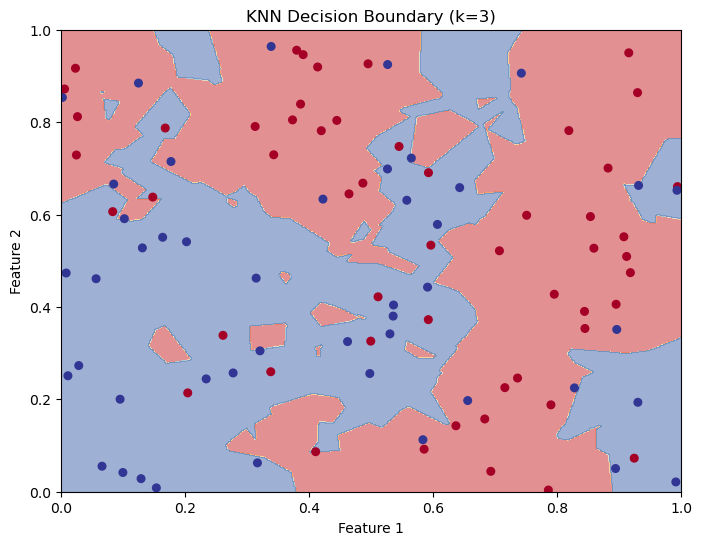

In [470]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

k = 3
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(x, y[:, 0])


xx, yy = np.meshgrid(np.linspace(0, 1, 500), np.linspace(0, 1, 500))
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Make predictions for the grid points
Z = knn_classifier.predict(grid_points)

# Reshape the predictions to match the shape of the mesh grid
Z = Z.reshape(xx.shape)

# Create a contour plot to visualize the decision boundaries
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.5)
plt.scatter(x[:, 0], x[:, 1], c=y[:, 0], cmap=plt.cm.RdYlBu, s=30)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title(f"KNN Decision Boundary (k={k})")
plt.show()

### Q7

#### a

* Error in predicitons from KNN algorithm is computed as follows

1. Count the number of misclassfifications 
2. Count total number of points for which prediction was made

3. $$\text{Error} = \frac{\text{Number of misclassified points}}{\text{Total number of points}}$$

In [331]:
def Knn_error(y_orignal, y_predicted) -> float:
    """
    generalistaion_error calculate the generalisation error based on predicted
    and orignal labels

    generalsiation error of Knn is given by (Total Labels correctly predicted from test set)/ (Total labels in test set)
    a value 0 indicates np label were correctly predicted
    a value 1 indicates all labels were correctly predicted

    :param y_orignal: orignal labels, shape (n, 1)
    :type y_orignal: np.array
    :param y_predicted: predicted labels, shape (n, 1)
    :type y_predicted: np.array
    :return: float values between 0 and 1
    :rtype: float
    """

    incorrect_labels = np.count_nonzero(y_orignal[:, 0] != y_predicted[:, 0])
    total_labels = y_orignal.size

    return incorrect_labels / total_labels

Pseudo code used to implement protocol a. The order of loops is changed to reduce time complexity

1. Run 100 times

    * Generate Set S of 100 points as done in Q6. No KNN invovled, only uniform radom sampling of position and labels

    * Generate the 5000 (4000 for training and 1000 for testing) points set. 

        * The position of points are uniformly distributed in [0, 1]

        * To decide the label we iterate through the 5000 points
            * decide P(head/tails) using `np.random.choice([0.8, 0.2])`
            * If Head then use KNN with 3 nearest neighbours on set S to decide the label
            * If tails then label is randomly chosen frmo {0,1}

     * We now have 5000 points and labels

     * Make a train set of 4000 points and test set of 1000 points using `sklearn.train_test_split`

     * Iterate over k = {1, 2, 3, ... 49}

        * Estimate labels for 1000 test points using KNN with k nearest neighbours in 4000 training points

        * Estimate the error for these 1000 points and store it in a dataframe
        
2. Final dataframe will look like this with 100x49= 4900 rows

|Index | K value | Run | Error |
|-----|---------|-----|-------|
 |  0   |    1    |  0  | 0.199 |
 |   1  |    2    |  0  | 0.203 |
 |   2  |    3    |  0  | 0.17  |
 |     |   .   | . |  .  |
 |     |   .   | . |  .  |
 |   48  |    49    |  0  | 0.533  |
 |   49  |    1    |  1  | 0.187 |
 |   50  |    2    |  1  | 0.145 |
 |     |   .   | . |  .  |
 |     |   .   | . |  .  |
 |   4898 |   48  |  99 | 0.154 |
 |    4899 |   49  |  99 | 0.155 |

In [490]:
final_df7 = pd.DataFrame(columns=["K value", "Run", "Error"])

final_df7

Empty DataFrame
Columns: [K value, Run, Error]
Index: []

In [491]:
for run in tqdm(range(100)):
    S_x = np.random.random(size=(100, 2))
    S_y = np.random.randint(0, 2, size=(100, 1))

    x = np.random.random(size=(5000, 2))  # these are the training and testing points
    coin = np.random.choice([0, 1], size=(5000, 1), p=[0.2, 0.8])  # Heads=1, Tails=0
    y = np.zeros((5000, 1))

    for i, test_point in enumerate(coin):
        if test_point == 1:  # Head
            y[i, 0] = knn_label(np.copy(S_x), np.copy(S_y), x[[i]], k=3)

        else:  # Tails
            y[i, 0] = np.random.randint(0, 2)

    x_train, x_test, y_train, y_test = train_test_split(
        x, y, train_size=4000, random_state=np.random.RandomState()
    )

    for k in range(1, 50):
        y_test_pred = np.zeros(shape=y_test.shape)
        for i, test_point in enumerate(x_test):
            y_test_pred[i, 0] = knn_label(
                np.copy(x_train), np.copy(y_train), test_point.reshape((1, 2)), k=k
            )

        last_row_index = len(final_df7)
        final_df7.at[last_row_index, "K value"] = k
        final_df7.at[last_row_index, "Run"] = run
        final_df7.at[last_row_index, "Error"] = Knn_error(y_test, y_test_pred)

100%|██████████| 100/100 [19:29<00:00, 11.70s/it]


In [523]:
final_df7.info()
final_df7.to_csv("Q7.csv", index=False)

<class 'pandas.core.frame.DataFrame'>
Index: 4900 entries, 0 to 4899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   K value  4900 non-null   object
 1   Run      4900 non-null   object
 2   Error    4900 non-null   object
dtypes: object(3)
memory usage: 282.2+ KB


1. For every k we have 100 error values

2. We find the mean and std of these 100 error values

3. We will then have a data frame with 50 rows like this

| Index | K value | Mean of MSE | Std of MSE |
|-------|---------|-------------|------------|
| 0     | 1       | 0.20464     | 0.012973   |
| 1     | 2       | 0.21064     | 0.018556   |
| 2     | 3       | 0.15883     | 0.012117   |
| .     | .       | . | . |
| .     | .       | . | . |
| 47    | 48      | 0.39694     | 0.128815   |
| 48    | 49      | 0.39995     | 0.125413   |

In [549]:
final_df7_2 = (
    final_df7.groupby(["K value"])["Error"]
    .agg(["mean", "std"])
    .rename(mapper={"mean": "Mean of MSE", "std": "Std of MSE"}, inplace=False, axis=1)
    .reset_index()
    .sort_values(by="K value")
)

# final_df7_2.rename(mapper= {'mean':'Mean'}, inplace= True, axis= 1)

final_df7_2.head(5)

K value Mean of MSE  Std of MSE
0        1     0.20464    0.012973
1        2     0.21064    0.018556
2        3     0.15883    0.012117
3        4     0.20117    0.043401
4        5     0.19993    0.043171

In [553]:
error_vs_k = go.Figure(
    go.Scatter(
        x=final_df7_2["K value"],
        y=final_df7_2["Mean of MSE"],
        hovertemplate="<b>k</b>: %{x:}<br><b>Error</b>: %{y}<br><extra></extra>",
    )
)

error_vs_k.update_layout(
    title="Misclassification rate vs K",
    xaxis=dict(title="K"),
    yaxis=dict(title="Missclasification Rate"),
)

error_vs_k.show()

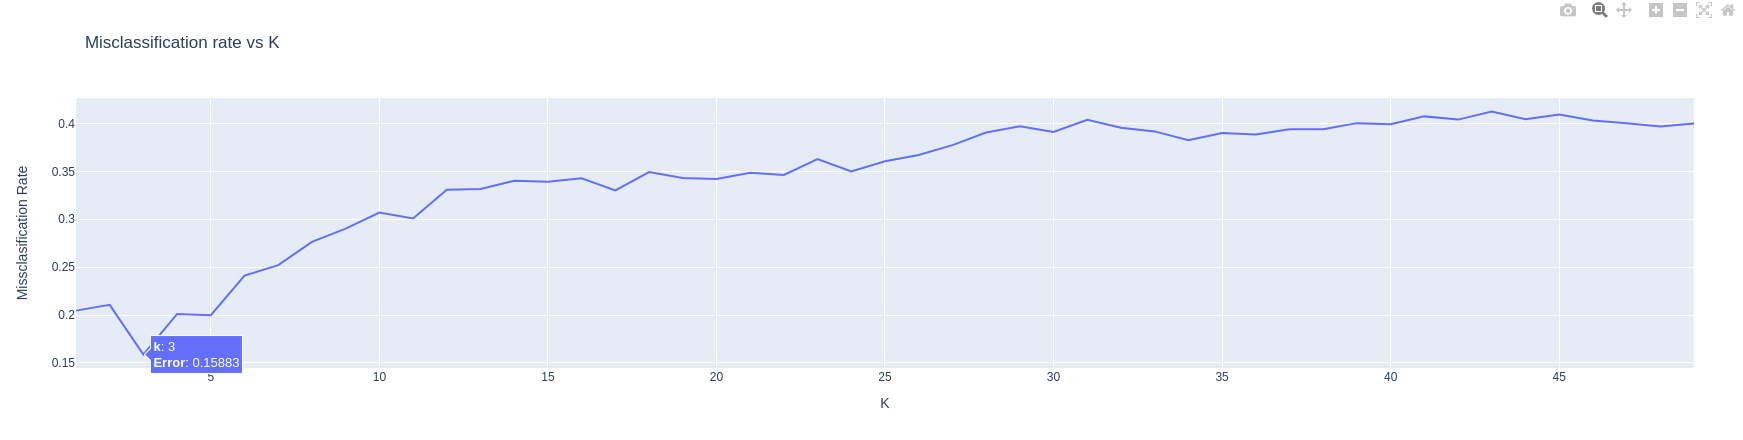

#### b

Reason for this shape

1. 
2. 
3. 
4. 
5.


### Q8

### a

Psedo code

Psedo code 
        
1. Iterate 100 times


    * Generate Set S of 100 points as done in Q6. No KNN invovled, only uniform random sampling of position and labels

    * Generate the 5000 (4000 for training and 1000 for testing) points set

    * To decide the label we iterate through the 5000 points
            * Estimate P(head/tails) using `np.random.choice([0.8, 0.2])`
            * If Heads then use KNN with 3 nearest neighbours on set S to decide the label
            * If Tails then label is randomly chosen from {0,1}

     * We now have 5000 points and labels

        * Iterate over m {100, 500, 1000, .... 3500, 4000}

            * Make a train set of m points and test set of 1000 points using `sklearn.train_test_split`
            
                * Iterate over k = {1, 2, 3, ... 49}
    
                    * Estimate labels for 1000 test points using KNN with k nearest neighbours in m training points
    
                    * Estimate the error for these 1000 points and store it in a dataframe
        
2. Final dataframe will look like this with 100x9x49= 44100 rows

| Index | K value | Run | m   | Error |
|-------|---------|-----|-----|-------|
| 0     | 1       | 0   | 100 | 0.3   |
| 1     | 2       | 0   | 100 | 0.329 |
| 2     | 3       | 0   | 100 | 0.332 |
| .     | .       | .   | .   | .     |
| .     | .       | .   | .   | .     |
| 44098 | 48      | 99  | 4000| 0.23  |
| 44099 | 49      | 99  | 4000| 0.158 |


In [555]:
final_df8 = pd.DataFrame(columns=["K value", "Run", "m", "Error"])

final_df8

Empty DataFrame
Columns: [K value, Run, m, Error]
Index: []

In [556]:
for run in tqdm(range(100)):
    S_x = np.random.random(size=(100, 2))
    S_y = np.random.randint(0, 2, size=(100, 1))

    x = np.random.random(size=(5000, 2))  # these are the training and testing points
    coin = np.random.choice([0, 1], size=(5000, 1), p=[0.2, 0.8])  # Heads=1, Tails=0
    y = np.zeros((5000, 1))

    for i, test_point in enumerate(coin):
        if test_point == 1:  # Head
            y[i, 0] = knn_label(np.copy(S_x), np.copy(S_y), x[[i]], k=3)

        else:  # Tails
            y[i, 0] = np.random.randint(0, 2)

    for m in [100, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000]:
        x_train, x_test, y_train, y_test = train_test_split(
            x, y, train_size=0.8, random_state=np.random.RandomState()
        )

        if m < 4000:
            x_train, _, y_train, _ = train_test_split(
                x_train, y_train, train_size=m, random_state=np.random.RandomState()
            )

        for k in range(1, 50):
            y_test_pred = np.zeros(shape=y_test.shape)

            for i, test_point in enumerate(x_test):
                y_test_pred[i, 0] = knn_label(
                    np.copy(x_train), np.copy(y_train), test_point.reshape((1, 2)), k=k
                )

            last_row_index = len(final_df8)
            final_df8.at[last_row_index, "K value"] = k
            final_df8.at[last_row_index, "Run"] = run
            final_df8.at[last_row_index, "m"] = m
            final_df8.at[last_row_index, "Error"] = Knn_error(y_test, y_test_pred)

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [1:30:25<00:00, 54.25s/it]


In [558]:
final_df8.to_csv("Q8.csv", index=False)

final_df8.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44100 entries, 0 to 44099
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   K value  44100 non-null  object
 1   Run      44100 non-null  object
 2   m        44100 non-null  object
 3   Error    44100 non-null  object
dtypes: object(4)
memory usage: 2.7+ MB


In [575]:
final_df8[(final_df8["m"] == 100) & (final_df8["K value"] == 5)]["Error"].std()

0.05193537164864451

In [580]:
final_df8_m_k = (
    final_df8.groupby(["m", "K value"])["Error"].agg(["mean", "std"]).reset_index()
)
final_df8_m_k

m  K value     mean       std
0     100        1  0.30299  0.028312
1     100        2  0.32871  0.038359
2     100        3   0.3004  0.036038
3     100        4  0.33206  0.052369
4     100        5   0.3347  0.051935
..    ...      ...      ...       ...
436  4000       45  0.37064  0.120160
437  4000       46  0.37783  0.128950
438  4000       47  0.37525  0.124314
439  4000       48  0.38081  0.123136
440  4000       49  0.37616  0.122655

[441 rows x 4 columns]

In [600]:
final_df8_m_k.sort_values(["m", "K value", "mean"]).groupby("m").head(1)

m  K value     mean       std
0     100        1  0.30299  0.028312
49    500        1   0.2437  0.019485
98   1000        1  0.22951  0.017275
147  1500        1  0.22023  0.015028
196  2000        1   0.2138  0.015402
245  2500        1  0.20995  0.015030
294  3000        1    0.208  0.012873
343  3500        1  0.20863  0.014593
392  4000        1  0.20379  0.015564

### Q9

#### a

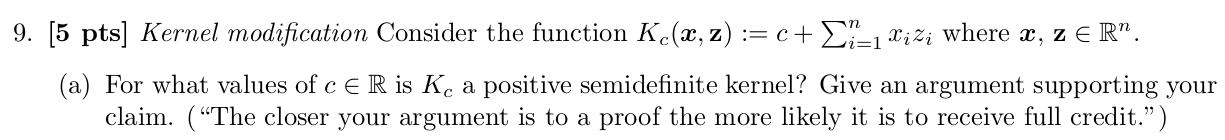

Steps to prove

1. For any set of vectors $S= \{ x_1, x_2, x_3.....x_m \}$ where $\vec{x_i} \in \mathbb{R}^n \ \forall\ i\in\{1, m\}$

2. For these set  of vectors we create Gram matrix **G** of shape m,m such that $G_{i,j}= K_c({x_i, x_j})$

$$
G = \begin{bmatrix}
    K_c(x_1, x_1) & K_c(x_1, x_2) & \cdots & K_c(x_1, x_m) \\
    K_c(x_2, x_1) & K_c(x_2, x_2) & \cdots & K_c(x_2, x_m) \\
    \vdots & \vdots & \ddots & \vdots \\
    K_c(x_m, x_1) & K_c(x_m, x_2) & \cdots & K_c(x_m, x_m) \\
\end{bmatrix}
$$

3. We break the matrix into two parts one with c one without c

4. We then find for waht values of c (if any) is G positive semi definite amtrix

For $x_i, x_j \in \mathbb{R}^n$

$$G_{i,j}= K_c(x_i, x_j)= c+ \vec{x_i} \cdot \vec{x_j}= c+ \sum_{k=1}^n (x_i)_k (x_j)_k$$

If G is posisitve semi definite then for any $\vec{v}$ with dimensions $\mathbb{R}^m$

$$\vec{v}^T G \vec{v} \geq 0$$

* First computing $\vec{v}^T G$ we get

$$\vec{v}^T G = \begin{bmatrix}
    \displaystyle\sum_{p=1}^m (c+ x_1 \cdot x_p ) v_p  \\
    \displaystyle\sum_{p=1}^m (c+ x_2 \cdot x_p ) v_p \\
    \vdots \\
    
    \displaystyle\sum_{p=1}^m (c+ x_m \cdot x_p) v_p
\end{bmatrix}^T$$

* Now computing $\vec{v}^T G \vec{v}$

$$\begin{aligned}
\vec{v}^T G \vec{v} &=  \displaystyle\sum_{q=1}^m \displaystyle\sum_{p=1}^m (c+ x_q \cdot x_p ) v_p v_q \newline


\vec{v}^T G \vec{v} &=  \displaystyle\sum_{q=1}^m \displaystyle\sum_{p=1}^m  \left[c+ \displaystyle\sum_{i=1}^n(x_q)_i (x_p)_i \right] v_p v_q \newline

\vec{v}^T G \vec{v} &=  \displaystyle\sum_{q=1}^m \displaystyle\sum_{p=1}^m c v_p v_q + 
\displaystyle\sum_{q=1}^m \displaystyle\sum_{p=1}^m \displaystyle\sum_{i=1}^n (x_q)_i (x_p)_i v_p v_q 
\tag{1}
\end{aligned}$$


* Now second term of RHS can be re-written by **rearranging the summations**

$$\begin{aligned}
\displaystyle\sum_{q=1}^m \displaystyle\sum_{p=1}^m \displaystyle\sum_{i=1}^n (x_q)_i (x_p)_i v_p v_q &= \displaystyle\sum_{i=1}^n \displaystyle\sum_{q=1}^m (x_q)_i v_q \displaystyle\sum_{p=1}^m (x_p)_i v_p \newline

&= \displaystyle\sum_{i=1}^n \left[\displaystyle\sum_{q=1}^m (x_q)_i v_q \right]^2
\end{aligned}$$

which is $\geq 0$ for all values of $\vec{x}$ and $\vec{v}$


* Similrly on rearraging the summation in  first term in LHS we get
$$\begin{aligned}
\displaystyle\sum_{q=1}^m \displaystyle\sum_{p=1}^m c v_p v_q &= c \displaystyle\sum_{q=1}^m  v_q \displaystyle\sum_{p=1}^m  v_q \newline

&= c \left[ \displaystyle\sum_{q=1}^m  v_q \right]^2
\end{aligned}$$

This value is $\geq$ 0 for all vallues of $\vec{x}$ **iff $c \geq 0$**

Hence the Kernel $K_c(x_i, x_j)= c+ \sum_{k=1}^n (x_i)_k (x_j)_k$ is positive semi definite for $c \geq 0$
